# Decision Tree

Entscheidungsbäume (*decision trees*) sind Methoden zur Regression und Klassifikation, die mit **Entscheidungsregeln** arbeiten. 

Für einfache Probleme sind Entscheidungsbäume (oder kurz Bäume) sehr leicht zu interpretieren, das ändert sich allerdings, wenn die Zahl der Prädiktoren hoch ist. Die Güte der Vorhersagen ist üblicherweise schlechter als bei anderen Ansätzen im supervised learning. Entscheidungsbäume neigen auch zu Overfitting.

In diesem Kapitel lernen wir die Theorie sowie die wichtigsten Algorithmen für Entscheidungsbäume kennen.

## Decision Tree in Python

In [1]:
import graphviz
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from bdsm.datasets import iris
from bdsm.metrics import confusion_matrix

### Datenset vorbereiten

In [2]:
df = iris()
X = df.drop("Class", axis=1)
y = df["Class"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33,random_state=147)


### Training

In [3]:
model = DecisionTreeClassifier(criterion="gini", random_state=147,max_depth=4, min_samples_leaf=2)   
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=147)

### Vorhersage

In [4]:
y_pred = model.predict(X_test)

In [5]:
confusion_matrix(y_pred, y_test)

Actual,Iris-setosa,Iris-versicolor,Iris-virginica
Predicted,,,
Iris-setosa,17,0,0
Iris-versicolor,0,10,0
Iris-virginica,0,3,20


### Visualisierung

In [6]:
labels = list(df["Class"].unique())
features = list(X.columns)

In [7]:
features

['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

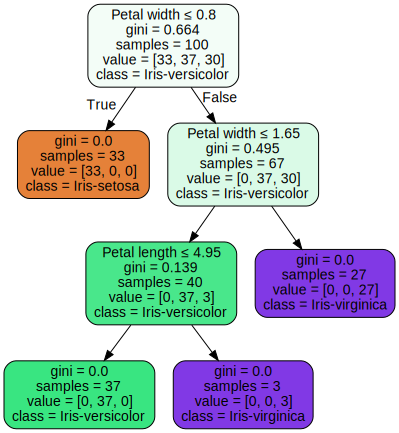

In [8]:
data = tree.export_graphviz(model,
                            out_file=None, 
                            feature_names=features,
                            class_names=labels,
                            filled=True,
                            rounded=True,  
                            special_characters=True)  
graph = graphviz.Source(data)  

graph

## Hyperparameter

https://scikit-learn.org/stable/modules/tree.html#classification

### Criterion

Die Aufteilung bei einem Knoten erfolgt in sklearn entweder mit 

- Gini Index (*impurity*)
- Information Gain (entropy)

Die Impurity ist ein Maß, wie homogen die Labels bei einem Node sind. Der Informationsgewinn (*information gain*) verwendet die Entropie als Maß und ein Split erfolgt so, dass der Informationsgewinn möglichst groß wird. Der Gini Index hingegen splittet so, dass die kleinsten Unreinheiten (impurities) entstehen.

In der Praxis liefern beide Maßzahlen annähernd gleich gute Ergebnisse, der Gini Index verwendet allerdings keinen Logarithmus zur Berrechnung und ist daher schneller.







### Splitter

Hier kann man zwischen **best** und **random** wählen. 

- best: berechnet die besten Features für den Split, liefert besseres Ergebnis
- random: wählt random Features, braucht weniger Rechenzeit, hilft bei Overfitting

### max_depth

Die theoretische Tiefe eines Baums ist von der Anzahl der Trainingssamples abhängig (und nicht von der Anzahl der Features, da an den gleichen Features mehrmals gesplittet werden kann). Jedoch führen tiefere Bäume zu **Overfitting**.

- None: Der Baum wird solange gesplitted, bis alle Blätter pur sind oder weniger labels als in min_samples_leaf definiert sind haben.

> **Wichtig**: Manche Hyperparameter haben Abhängigkeiten untereinander!

Allgemein gilt, **je tiefer** ein Baum wird, **desto komplexer** wird das Modell (man hat mehr Splits) und es ist mehr Information über die Trainingsdaten im Modell enthalten. Das ist einer der Gründe für Overfitting!

Wenn das Model overfittet, ist die Reduktion der max_depth eine weitere Maßnahme dagegen.

## Berechnung des Information Gain im ID3 Example

Beispiel Attribut "Humidity"

In [9]:
S = -(9/14)*np.log2(9/14)-(5/14)*np.log2(5/14)

In [10]:
S1 = -(3/7)*np.log2(3/7)-(4/7)*np.log2(4/7)
S1

0.9852281360342515

In [11]:
S2 = -(6/7)*np.log2(6/7)-(1/7)*np.log2(1/7)
S2

0.5916727785823275

In [12]:
E = (3+4)/14 * S1 + (6+1)/14 * S2
E

0.7884504573082896

In [13]:
G = S - E
G

0.15183550136234159